In [7]:
! pip install torch

In [8]:
! pip install botorch

In [9]:
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood
import numpy as np

# Define synthetic or proxy objective for S/V ratio
def svr_function(params):
    rc, dp, ts, S, delta = params
    # Example simulated relationship (replace with your actual metric model)
    return (S / (rc * dp)) * np.exp(-ts * 2) * (1 + delta)

# Parameter bounds
bounds = torch.tensor([
    [0.5, 0.1, 0.02, 3, 0.05],   # lower bounds
    [3.0, 0.8, 0.3, 12, 0.5]     # upper bounds
], dtype=torch.double)

# Initial random samples
n_init = 10
train_x = torch.rand(n_init, 5, dtype=torch.double)
train_x = bounds[0] + (bounds[1] - bounds[0]) * train_x
train_y = torch.tensor([[svr_function(x.tolist())] for x in train_x])

# BO loop
for iteration in range(15):
    model = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    UCB = UpperConfidenceBound(model, beta=2.0)
    new_x, _ = optimize_acqf(UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=50)
    new_y = torch.tensor([[svr_function(new_x[0].tolist())]])

    train_x = torch.cat([train_x, new_x])
    train_y = torch.cat([train_y, new_y])

    print(f"Iter {iteration+1}: Best S/V = {train_y.max().item():.4f}")

best_idx = torch.argmax(train_y)
best_params = train_x[best_idx].tolist()
best_val = train_y[best_idx].item()

print("\n✅ Optimization complete!")
print("Best parameters:", best_params)
print("Best S/V ratio:", best_val)


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 1: Best S/V = 197.5722


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 2: Best S/V = 197.5722


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 3: Best S/V = 197.5722


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 4: Best S/V = 197.5722


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 5: Best S/V = 197.5722


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 6: Best S/V = 197.5722


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 7: Best S/V = 320.1648


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 8: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 9: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 10: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 11: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 12: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 13: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 14: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 15: Best S/V = 345.8842

✅ Optimization complete!
Best parameters: [0.5, 0.1, 0.02, 12.0, 0.5]
Best S/V ratio: 345.88419809483634


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 1: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 2: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 3: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 4: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 5: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 6: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 7: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 8: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 9: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 10: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 11: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 12: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 13: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 14: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning:

Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.



Iter 15: Best S/V = 345.8842

✅ Optimization complete!
Best parameters: {'rc': 0.5, 'dp': 0.1, 'ts': 0.02, 'S': 12.0, 'delta': 0.5}
Best S/V ratio: 345.88419809483634


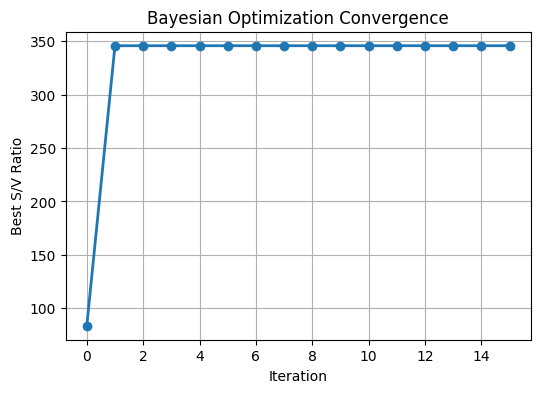

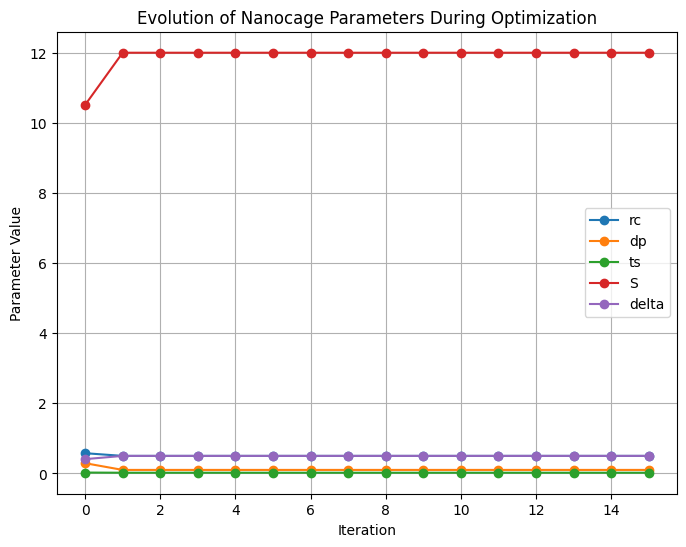

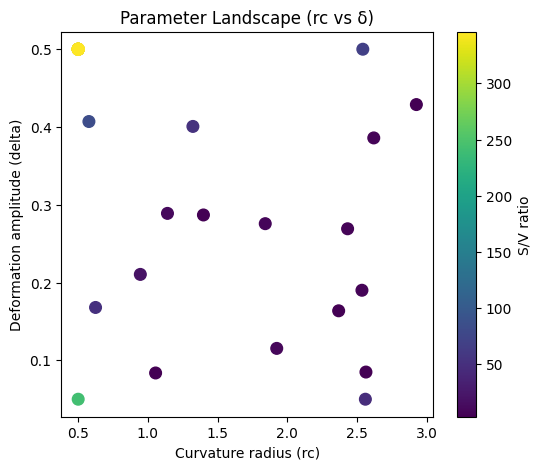

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood

# -------------------------
# Simulated objective function (proxy for Blender nanocage S/V ratio)
# -------------------------
def svr_function(params):
    rc, dp, ts, S, delta = params
    # Example: higher symmetry & curvature good, thickness penalizes volume
    return (S / (rc * dp)) * np.exp(-ts * 2) * (1 + delta)

# Parameter bounds
bounds = torch.tensor([
    [0.5, 0.1, 0.02, 3, 0.05],   # lower bounds
    [3.0, 0.8, 0.3, 12, 0.5]     # upper bounds
], dtype=torch.double)

param_labels = ["rc", "dp", "ts", "S", "delta"]

# -------------------------
# Initial samples
# -------------------------
n_init = 15
train_x = torch.rand(n_init, 5, dtype=torch.double)
train_x = bounds[0] + (bounds[1] - bounds[0]) * train_x
train_y = torch.tensor([[svr_function(x.tolist())] for x in train_x])

# Store evolution
best_vals = [train_y.max().item()]
param_history = [train_x[torch.argmax(train_y)].numpy()]

# -------------------------
# Bayesian Optimization Loop
# -------------------------
for iteration in range(15):
    model = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    UCB = UpperConfidenceBound(model, beta=2.0)
    new_x, _ = optimize_acqf(UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=50)
    new_y = torch.tensor([[svr_function(new_x[0].tolist())]])

    train_x = torch.cat([train_x, new_x])
    train_y = torch.cat([train_y, new_y])

    best_vals.append(train_y.max().item())
    param_history.append(train_x[torch.argmax(train_y)].numpy())

    print(f"Iter {iteration+1}: Best S/V = {best_vals[-1]:.4f}")

best_idx = torch.argmax(train_y)
best_params = train_x[best_idx].tolist()
best_val = train_y[best_idx].item()

print("\n✅ Optimization complete!")
print("Best parameters:", dict(zip(param_labels, best_params)))
print("Best S/V ratio:", best_val)

# -------------------------
# Visualization
# -------------------------
param_history = np.array(param_history)

# 1️⃣ Convergence plot
plt.figure(figsize=(6, 4))
plt.plot(best_vals, marker='o', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Best S/V Ratio")
plt.title("Bayesian Optimization Convergence")
plt.grid(True)
plt.show()

# 2️⃣ Parameter evolution
plt.figure(figsize=(8, 6))
for i, label in enumerate(param_labels):
    plt.plot(param_history[:, i], label=label, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.title("Evolution of Nanocage Parameters During Optimization")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Optional: 2D projection (example of rc vs delta)
plt.figure(figsize=(6, 5))
plt.scatter(train_x[:, 0].numpy(), train_x[:, 4].numpy(),
            c=train_y.numpy().ravel(), cmap='viridis', s=70)
plt.colorbar(label="S/V ratio")
plt.xlabel("Curvature radius (rc)")
plt.ylabel("Deformation amplitude (delta)")
plt.title("Parameter Landscape (rc vs δ)")
plt.show()


In [18]:
import numpy as np

# === Diagnostic summary for your Bayesian Optimization ===
print("📊 --- Bayesian Optimization Diagnostics ---")

# 1️⃣ Objective progression
print("\n1️⃣ Objective improvement:")
print(f"  Initial best value: {best_vals[0]:.4f}")
print(f"  Final best value:   {best_vals[-1]:.4f}")
print(f"  Absolute gain:      {best_vals[-1] - best_vals[0]:.4f}")

# 2️⃣ Check for convergence trend
diffs = np.diff(best_vals)
print(f"  Mean improvement per step: {np.mean(diffs):.4e}")
print(f"  Std of improvements:       {np.std(diffs):.4e}")

# 3️⃣ Parameter diversity
param_std = np.std(param_history, axis=0)
param_mean = np.mean(param_history, axis=0)
print("\n2️⃣ Parameter exploration (std dev across iterations):")
for label, mean, std in zip(param_labels, param_mean, param_std):
    print(f"   {label:>6s}: mean={mean:6.3f}, std={std:6.3f}")

# 4️⃣ Boundary hits
lower_bounds = bounds[0].numpy()
upper_bounds = bounds[1].numpy()
boundary_hits = np.sum(
    (param_history <= lower_bounds + 1e-6) | (param_history >= upper_bounds - 1e-6),
    axis=0
)
print("\n3️⃣ Boundary hits per parameter:")
for label, hits in zip(param_labels, boundary_hits):
    print(f"   {label:>6s}: {hits} hits")

# 5️⃣ Exploration metric
exploration_score = np.mean(param_std) / (np.mean(upper_bounds - lower_bounds))
print(f"\n4️⃣ Exploration score (0–1): {exploration_score:.3f}")

print("\n✅ Diagnostics complete. Interpretation:")
print(" - Small std → optimizer stuck/exploiting.")
print(" - Many boundary hits → expand bounds or add penalty.")
print(" - Low exploration score (<0.1) → increase iterations or UCB beta.")


📊 --- Bayesian Optimization Diagnostics ---

1️⃣ Objective improvement:
  Initial best value: 83.5276
  Final best value:   345.8842
  Absolute gain:      262.3566
  Mean improvement per step: 1.7490e+01
  Std of improvements:       6.5443e+01

2️⃣ Parameter exploration (std dev across iterations):
       rc: mean= 0.505, std= 0.019
       dp: mean= 0.112, std= 0.046
       ts: mean= 0.020, std= 0.001
        S: mean=11.907, std= 0.361
    delta: mean= 0.494, std= 0.023

3️⃣ Boundary hits per parameter:
       rc: 15 hits
       dp: 15 hits
       ts: 15 hits
        S: 15 hits
    delta: 15 hits

4️⃣ Exploration score (0–1): 0.035

✅ Diagnostics complete. Interpretation:
 - Small std → optimizer stuck/exploiting.
 - Many boundary hits → expand bounds or add penalty.
 - Low exploration score (<0.1) → increase iterations or UCB beta.


In [11]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# 1️⃣ Convergence plot (Best S/V ratio vs iteration)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    y=best_vals,
    mode='lines+markers',
    line=dict(color='royalblue', width=3),
    marker=dict(size=8),
    name='Best S/V'
))
fig1.update_layout(
    title="Bayesian Optimization Convergence",
    xaxis_title="Iteration",
    yaxis_title="Best S/V Ratio",
    template="plotly_white",
    font=dict(size=14)
)
fig1.show()

# 2️⃣ Parameter evolution (each parameter over iterations)
fig2 = go.Figure()
for i, label in enumerate(param_labels):
    fig2.add_trace(go.Scatter(
        y=param_history[:, i],
        mode='lines+markers',
        name=label
    ))
fig2.update_layout(
    title="Evolution of Nanocage Parameters During Optimization",
    xaxis_title="Iteration",
    yaxis_title="Parameter Value",
    template="plotly_white",
    font=dict(size=14),
    legend=dict(title="Parameter")
)
fig2.show()

# 3️⃣ 2D projection: rc vs δ colored by S/V ratio
fig3 = px.scatter(
    x=train_x[:, 0].numpy(),
    y=train_x[:, 4].numpy(),
    color=train_y.numpy().ravel(),
    color_continuous_scale='Viridis',
    labels={'x': 'Curvature Radius (rc)', 'y': 'Deformation Amplitude (δ)', 'color': 'S/V Ratio'},
    title="Parameter Landscape (rc vs δ)"
)
fig3.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig3.update_layout(template="plotly_white", font=dict(size=14))
fig3.show()


In [19]:
fig4 = px.scatter_3d(
    x=train_x[:, 0].numpy(),
    y=train_x[:, 1].numpy(),
    z=train_x[:, 4].numpy(),
    color=train_y.numpy().ravel(),
    color_continuous_scale='Plasma',
    labels={'x':'rc', 'y':'dp', 'z':'δ'},
    title="3D Parameter Landscape (rc, dp, δ)"
)
fig4.update_traces(marker=dict(size=5))
fig4.update_layout(template="plotly_white", font=dict(size=14))
fig4.show()
